In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
species_info = pd.read_csv("species_info.csv")

In [14]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [8]:
observations = pd.read_csv("observations.csv")

In [10]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [40]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [44]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [48]:
species_info['conservation_status'] = species_info['conservation_status'].fillna('No Concern')

In [50]:
status_counts = species_info['conservation_status'].value_counts()

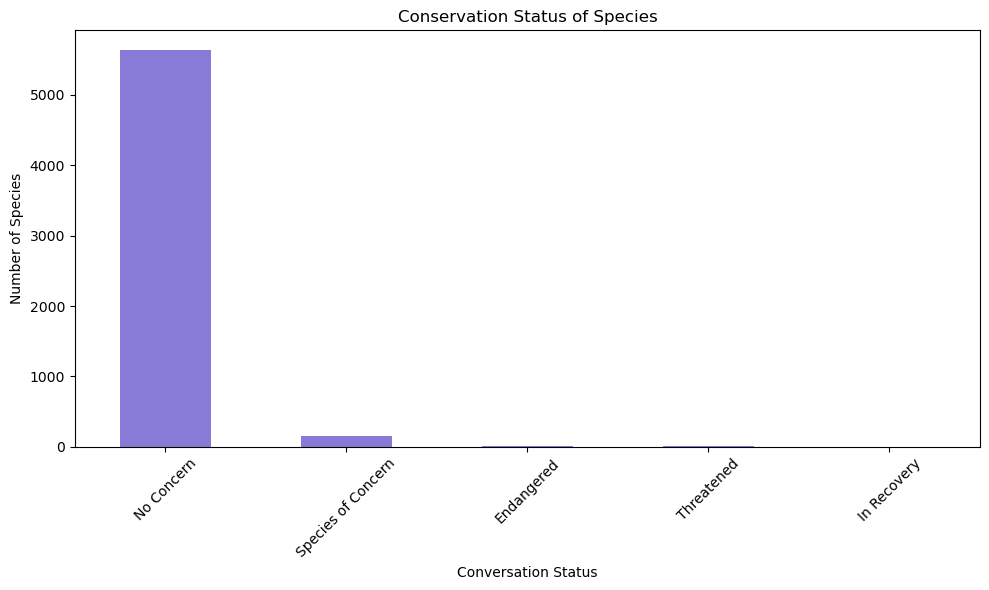

In [56]:
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='slateblue', alpha=0.8)
plt.title('Conservation Status of Species')
plt.xlabel('Conversation Status') 
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('conservation.png')
plt.show()

In [58]:
observations_counts = observations['observations'].value_counts()

In [64]:
merged = pd.merge(species_info, observations, on='scientific_name')
merged['conservation_status'] = merged['conservation_status'].fillna('No Concern')
grouped = merged.groupby(['park_name', 'conservation_status'])['scientific_name'].nunique().unstack()

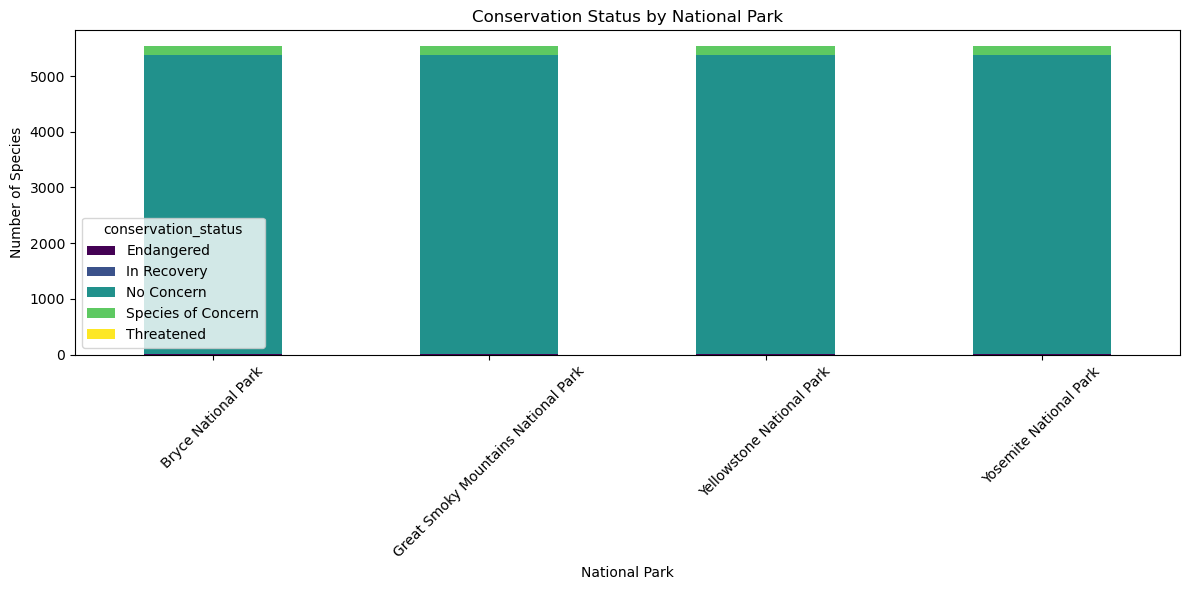

In [68]:
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Conservation Status by National Park')
plt.xlabel('National Park')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('conservation_by_park.png')
plt.show()

In [70]:
merged = pd.merge(species_info, observations, on='scientific_name')
merged['conservation_status'] = merged['conservation_status'].fillna('No Concern')
category_by_park = merged.groupby(['park_name', 'category'])['scientific_name'].nunique().unstack()

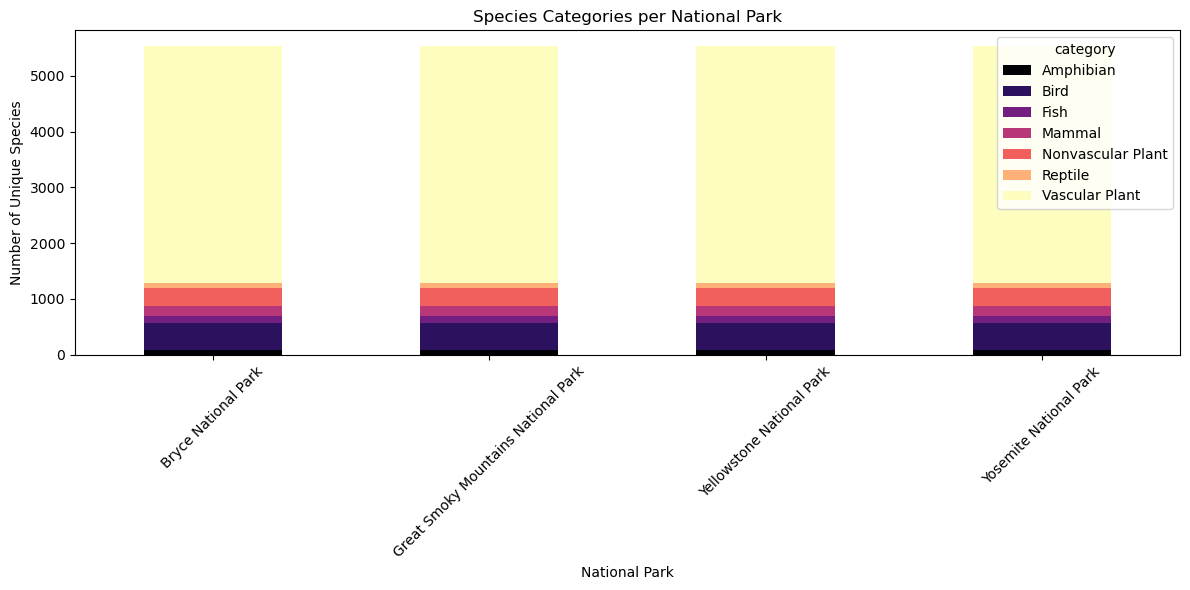

In [74]:
category_by_park.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='magma')
plt.title('Species Categories per National Park')
plt.xlabel('National Park')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('species_categories_by_park.png')
plt.show()

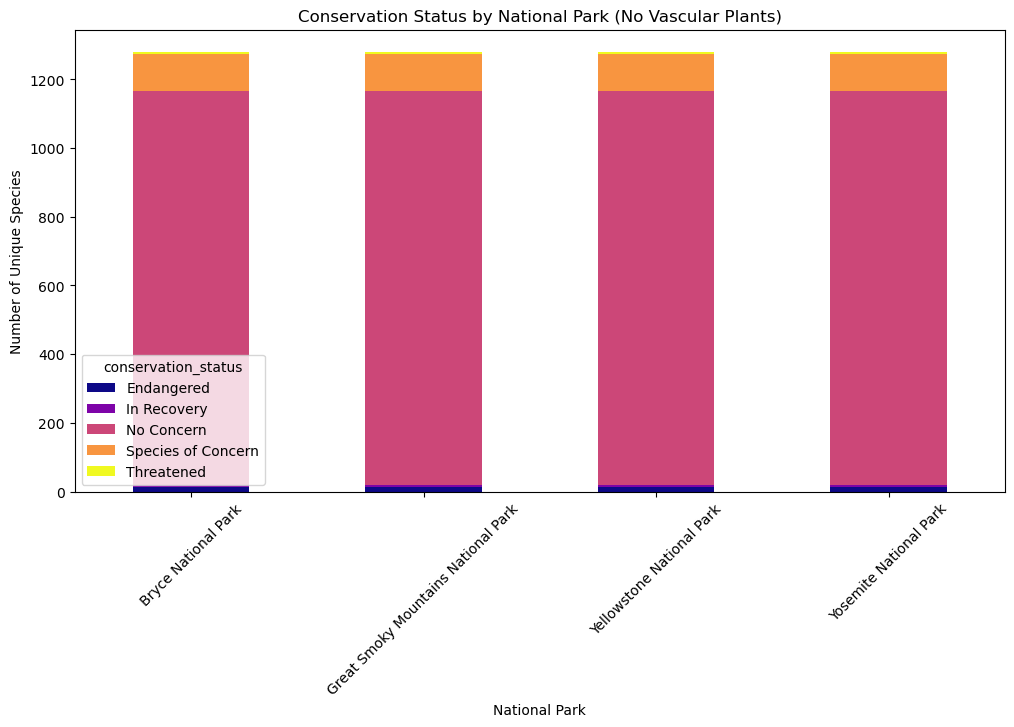

In [78]:
filtered = merged[merged['category'] != 'Vascular Plant']
status_by_park = filtered.groupby(['park_name', 'conservation_status'])['scientific_name'].nunique().unstack()
status_by_park.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Conservation Status by National Park (No Vascular Plants)')
plt.xlabel('National Park')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.tight_layout
plt.savefig('conservation_by_park_no_plants.png')
plt.show()

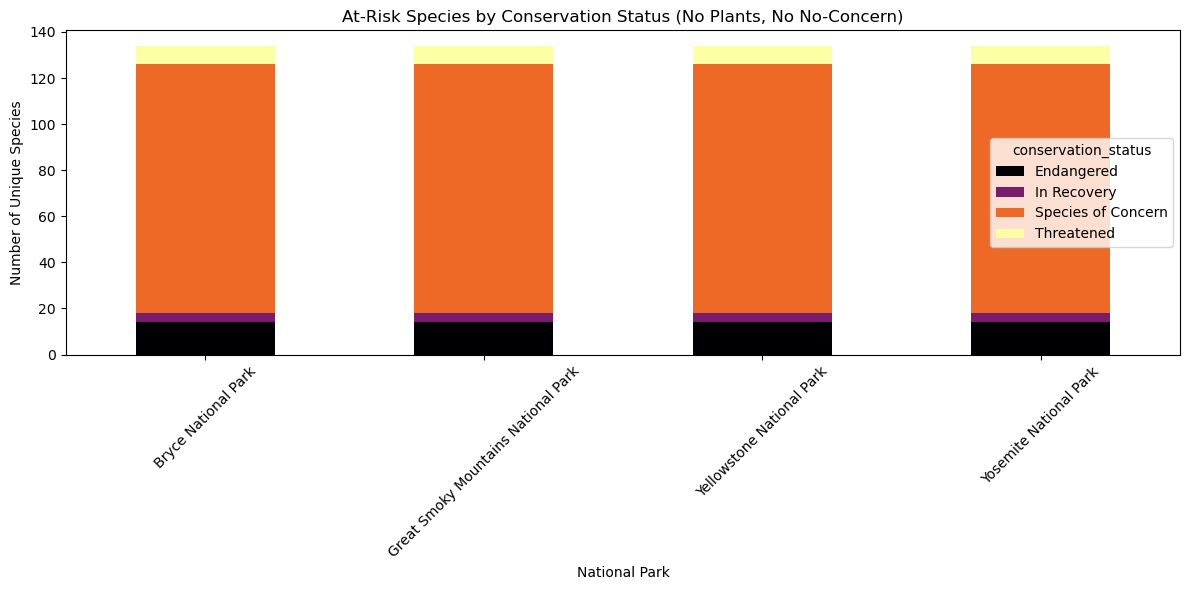

In [82]:
filtered = merged[
    (merged['category'] != 'Vascular Plant') &
    (merged['conservation_status'].notna()) &
    (merged['conservation_status'] != 'No Concern')
]
status_by_park = filtered.groupby(['park_name', 'conservation_status'])['scientific_name'].nunique().unstack()
status_by_park.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='inferno')
plt.title('At-Risk Species by Conservation Status (No Plants, No No-Concern)')
plt.xlabel('National Park')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('at_risk_species_by_park.png')
plt.show()